![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

**Ideia original**: Luan Lima

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 2: Erros no algoritmo da bisseção

## Questão 1: Todos os pontos da bisseção

Neste teste vamos estudar a evolução do erro no eixo $y$ no decorrer do algoritmo da bisseção.
Para isso, vamos usar uma variação do método da bisseção que retorne
uma lista com todos os pontos percorridos pelo algoritmo até atingir o critério de parada.

Implemente a função `bissecao_pts`, utilizando como critérios de parada `xtol`, `ytol` e `maxiter`.

## Validação da função bissecao

A cédula abaixo importa e define tipos e funções utilizados na função de validação da bisseção e na na própria função que implementa o algoritimo da bisseção.

In [2]:
from typing import List, Union, cast

FloatInt = Union[float, int]

def isFloatInt(n: any) -> bool:
    '''Verifica se n é um float ou inteiro'''
    return type(n) in [float, int] or np.isreal(n)

def all_have_same_sign(l: List[FloatInt]) -> bool:
    '''Verifica se todos os elementos de uma lista tem o mesmo sinal'''
    return not min(l) < 0 < max(l)

Definimos então a função que valida os argumentos passados para a função bissecao:

In [3]:
from inspect import isfunction
from typing import Callable



def validate_bissect_args(f: Callable, a: FloatInt, b: FloatInt, xtol: FloatInt = 1e-8, ytol: FloatInt = 1e-8,  maxiter: int = 10) -> None:
    '''Verifica se os argumentos passados para a função bisseção estão corretos, i.e,
    se não podem causar um erro inesperado quando a função for invocada'''
    assert isfunction(f), f'O parâmetro f: {f} deve ser uma função'
    assert isFloatInt(a), f'O parâmetro a: {a} deve ser um float ou um inteiro'
    assert isFloatInt(b), f'O parâmetro b: {b} deve ser um float ou um inteiro'
    assert a != b, f'Os números a: {a} e b: {b} devem ser distintos'
    
    f_name = f.__name__
    assert not all_have_same_sign(
        [f(a), f(b)]), f'Os valores da função {f_name}, {f_name}({a}) = {f(a)} e {f_name}({b}) = {f(b)} devem ter sinais opostos'
    assert isFloatInt(
        xtol), f'O parâmetro xtol: {xtol} deve ser um float ou um inteiro'
    assert xtol >= 0, f'O número xtol: {xtol} deve ser maior ou igual a zero'
    assert isFloatInt(
        xtol), f'O parâmetro ytol: {ytol} deve ser um float ou um inteiro'
    assert ytol >= 0, f'O número ytol: {ytol} deve ser maior ou igual a zero'
    assert type(
        maxiter) == int, f'O parâmetro maxiter {maxiter} deve ser um inteiro'
    assert maxiter > 0, f'O número de iterações {maxiter} deve ser positivo'

Finalmente, implementamos a função da bisseção que retorna o conjunto de pontos obtidos em cada iteraçõe:

In [4]:
def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    """
    validate_bissect_args(f, a, b, xtol, ytol, maxiter)
    
    low = min([a, b])
    high = max([a, b])
    niter = 0
    pts = []
    
    while True:
        niter += 1
        mid = (high + low) / 2
        pts.append(mid)

        reached_maxiter = niter == maxiter
        if reached_maxiter:
            break

        reached_xtol = abs(b-a) <= xtol
        if reached_xtol:
            break

        f_of_mid = f(pts[-1])
        reached_ytol = abs(f_of_mid) <= ytol
        if reached_ytol:
            break

        if np.sign(f_of_mid) == np.sign(f(low)):
            low = mid
        else:
            high = mid

    return pts

Alguns testes básicos para esta nova bisseção.

In [5]:
def p(a): 
    def f(x): return np.tan(x)-a
    return f

In [6]:
pts = bissecao_pts(p(1),0,np.pi/2, ytol=0)
assert abs(pts[-1]-np.pi/4) < 1e-8

In [7]:
for a in np.logspace(1,4):
    pts = bissecao_pts(p(a),0,np.pi/2, xtol=0)
    assert 1e-10 < abs(np.tan(pts[-1])-a) < 1e-8, (a, abs(np.tan(pts[-1])-a), len(pts))
    assert 1e-8 < abs(np.tan(pts[-2])-a)

In [8]:
for n in range(2,10):
    pts = bissecao_pts(p(n),0,np.pi/2, xtol=0)
    assert 25 < len(pts) < 35

## Questão 2: Aquecimento

Vamos começar estudando como se comporta o erro em $y$ para a função $f(x) = \sin(x)$. Faça um gráfico que contenha:
- no eixo horizontal, o número $n$ de iterações realizadas
- no eixo vertical, o erro em $y$ após a $n$-ésima iteração.

Utilize o intervalo padrão abaixo para todas as questões do teste.

In [9]:
a = -1+1e-12
b = 1/2

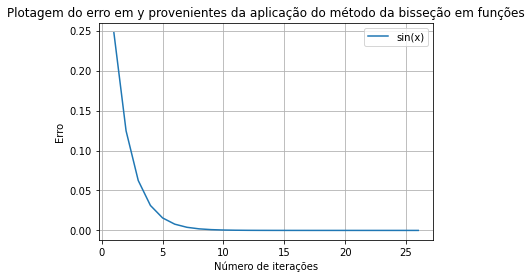

In [10]:
from inspect import isfunction

def validate_plot_bissecao_pts_y_errors(functions, labels, a, b, title, xtol=1e-8, ytol=1e-8, maxiter=100):
    '''Verifica se os argumentos passados para a função de plotagem da bisseção estão corretos, i.e,
    se não podem causar um erro inesperado quando a função for invocada'''
    assert type(
        functions) == list, f"O argumento {functions} deve ser uma lista de funções"
    assert all([isfunction(f) for f in functions]
               ), f"Todos elementos de {functions} devem ser uma função"
    assert type(
        labels) == list, f"O argumento {labels} deve ser uma lista de strings"
    assert all([isinstance(label, str) for label in labels]
               ), f"Todos elementos de {labels} devem ser uma string"
    assert type(title) == str, f"O argumento title: {title} deve ser uma string"
    assert len(functions) == len(labels), f"O número de labels ({len(labels)}) deve ser igual ao número de funções ({len(functions)})"

def plot_bissecao_pts_y_errors(functions, labels, a, b, title = 'Plotagem do erro em y provenientes da aplicação do método da bisseção em funções', xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Plota um gráfico com o erro (do método da bisseção) em y após n-ésima
    iteração no eixo das ordenadas e o número n de iterações correspondente
    no eixo das abcissas para uma lista de funções passadas
    """
    validate_plot_bissecao_pts_y_errors(functions, labels, a, b, title, xtol, ytol, maxiter)
    

    def get_axis_to_plot(f):
        pts = bissecao_pts(f, a, b, xtol, ytol, maxiter)
        number_of_iterations = np.arange(1, len(pts)+1)
        y_errors = [abs(f(pt)) for pt in pts]
        return (number_of_iterations, y_errors)

    def plot_all(f_plots_data):
        for f_plot_data in f_plots_data:
            axis, label = f_plot_data
            plt.plot(axis[0], axis[1], label=label)

    f_plots_data = [(get_axis_to_plot(f), labels[i])
                    for i, f in enumerate(functions)]
    plot_all(f_plots_data)

    def set_plot_layout():
        plt.title(title)
        plt.xlabel('Número de iterações')
        plt.ylabel('Erro')
        plt.grid()
        plt.legend()

    set_plot_layout()
    plt.show()

def f(x): return np.sin(x)
plot_bissecao_pts_y_errors([f], ["sin(x)"], a, b)

Comente o gráfico. O que você observa sobre a velocidade de convergência do método?

Parece que o erro diminui exponencialmente com o número de iterações. Em termos de taxa de convergência, temos, que, por definição, a ordem de convergência é:

lim  |pn+1−p*|/|pn−p*|^α = λ para n -> infinito, onde n é o número da iteração, λ é uma constante e po,p1,p2...pn é uma sequência que converge para p*.

No caso da nossa implementação do algoritimo da bisseção, p* = 0 e pn = 2^n.(b-a). Calculando o limite acima, teremos que
λ = 1 e α = 1/2 - uma convergência de ordem linear.

Agora represente, em um mesmo gráfico, a evolução do erro em $y$ para as funções $f(x) = \sin(x)$ e $g(x) = \sqrt[3]{x}$ (use `np.cbrt`).

Não se esqueça de botar título, legendas e labels nos eixos.

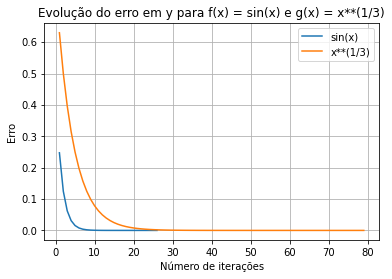

In [11]:
def g(x): return np.cbrt([x])

ax = plt.gca()
plot_bissecao_pts_y_errors([f, g], ["sin(x)", "x**(1/3)"], a, b, title = "Evolução do erro em y para f(x) = sin(x) e g(x) = x**(1/3)")

In [12]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [13]:
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

Compare a velocidade de convergência do método relativamente às duas funções. Como você explica essa diferença? Sinta-se à vontade para utilizar mais gráficos ou caixas de código para ajudar na sua explicação.

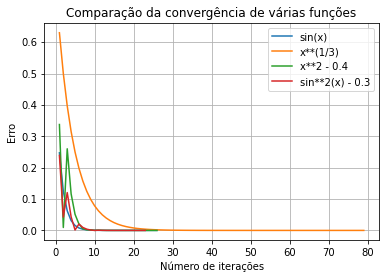

In [14]:
def k(x): return x**2 - 0.4
def j(x): return np.sin(x)**2 - 0.3

plot_bissecao_pts_y_errors([f, g, k, j], ["sin(x)", "x**(1/3)", "x**2 - 0.4", "sin**2(x) - 0.3"], a, b, title="Comparação da convergência de várias funções")


Podemos ver que para determinadas funções, a convergência não é exponencial no início - podendo inclusive ter um erro maior numa determinada iteração do que na anterior. Mas a partir de certo valor, todas parecem convergir exponencialmente - algumas mais rapidamente que outras.

## Questão 3: Uma função diferentona

Agora vamos bolar uma função um pouco diferente para explorar os limites do método de bisseção. A função vai ser:

In [15]:
def h(x):
    return np.sign(x) / np.log(np.abs(x))

Faça um gráfico dessa função em uma vizinhança de 0.

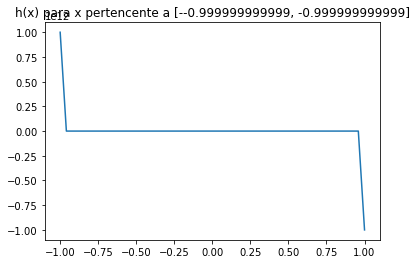

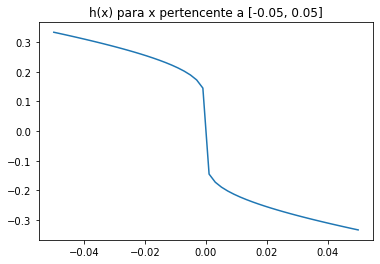

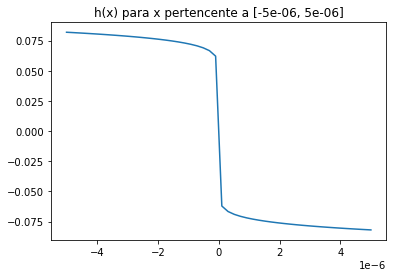

In [16]:
def plot_function(f, left = -1+1e-8, right = 1-1e-8, title = ""):
    x_axis = np.linspace(left, right)
    y_axis = [f(x) for x in x_axis]
    plt.plot(x_axis, y_axis)
    
    title = title if title != "" else f"{f._name__}(x) para x pertencente ao intervalo [{left}, {right}]"
    plt.title(title)
    plt.show()
    

ax = plt.gca()

def plot_function_for_limits(f, limits = [a, 0.05, 0.000005]):
    for limit in limits:
        plot_function(f, -limit, limit, title = f"{f.__name__}(x) para x pertencente a [-{limit}, {limit}]")

plot_function_for_limits(h)

In [17]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1

Faça mais um gráfico, dessa vez comparando a evolução dos erros para as funções $f$, $g$ e $h$.

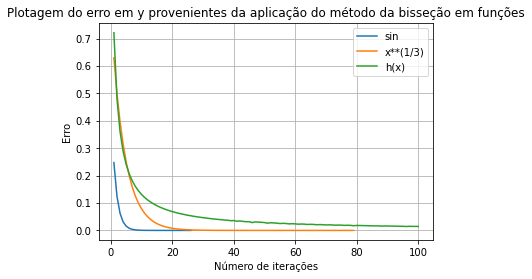

In [18]:
ax = plt.gca()
plot_bissecao_pts_y_errors([f, g, h], ["sin", "x**(1/3)", "h(x)"], a, b)

In [19]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

O que aconteceu desta vez? Explique o porquê.

A raíz obtida convergiu (o erro diminui a cada iteração), mas mais lentamente do que para as outras funções. 
Podemos analisar melhor o que está ocorrendo aumentando o número máximo de iterações permitidas:

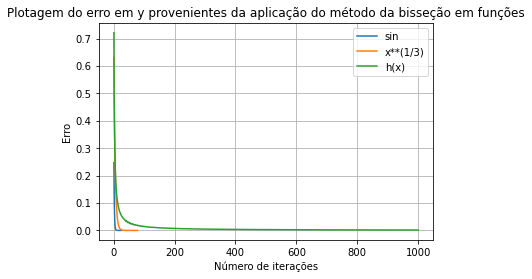

In [20]:
new_maxiter = 1000
plot_bissecao_pts_y_errors([f, g, h], ["sin", "x**(1/3)", "h(x)"], a, b, maxiter=new_maxiter)

Notamos que o erro continua a diminuir à medida que aumentamos o número de iterações, mas mesmo com 1000 iterações não é possível atingir as tolerâncias desejadas. A explicação da lentidão dessa convergência pode ser entendida analisando o gráfico de h(x) bem próximo de 0 (mostrado no início da questão 3): nesse intervalo, uma variação pequena em x gera uma variação enorme em y e o método da bisseção se torna lento, uma vez que vários intervalos são necessários para se aproximar da raíz.

(CONFESSO QUE ACHO QUE ENTENDI MAS NÃO SOUBE COLOCAR A IDEIA EM PALAVRAS 🥺🥺)


## Questão 4: O outro lado da moeda

Para fechar com chave de ouro, vamos estudar a evolução do erro da função $h_2(x) = h^{-1}(x)$, isto é, a função $h_2$ tal que $h_2(h(x)) = x$ (digamos, em uma vizinhança de $x=0$). Implemente a função $h_2$ abaixo:

In [21]:
from math import e, isclose

def h2(h):
    '''Função inversa de h(x) supondo x pertence ao intervalo (-1, 1)'''
    h_of_x = h
    # Para o intervalo [-1, 1], se h_of_x < 0, então x > 0     
    is_x_positive = h_of_x < 0
    if is_x_positive:
        return e**(1/h_of_x)
    else:
        return -e**(-1/h_of_x)

### Testando a função h2()



In [22]:
for x in np.linspace(-1+1e-8,1-1e-8,200):
    assert abs(h2(h(x))-x) < 1e-15, (x, x - h2(h(x)))
    assert abs(h(h2(x))-x) < 1e-15, (x, x - h(h2(x)))

Repita os estudos realizados anteriormente, com a inclusão de $h_2$.

Comente os resultados abaixo.

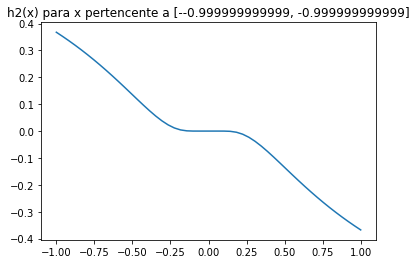

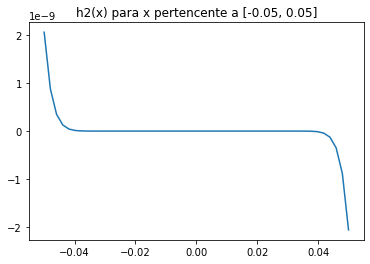

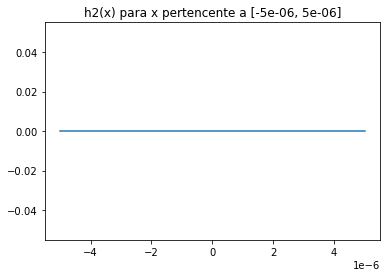

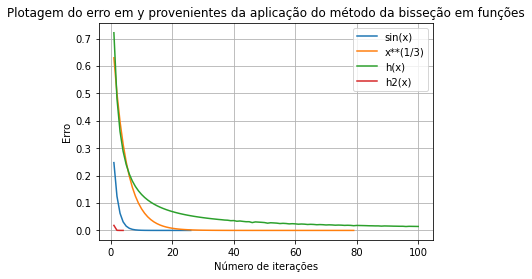

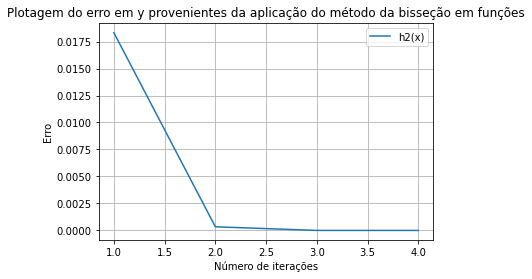

In [23]:
ax = plt.gca()

plot_function_for_limits(h2)

plot_bissecao_pts_y_errors([f, g, h, h2], ["sin(x)", "x**(1/3)", "h(x)", "h2(x)"], a, b)
plot_bissecao_pts_y_errors([h2], ["h2(x)"], a, b)

# pts = bissecao_pts(h2, a, b)
# print(pts)

Do último gráfico, podemos ver que o erro converge rapidamente para 0 para a função h2(x). A explicação é análoga é similar à dada para a convergência lenta de h(x), mas inversa: nas proximidades de zero, existe uma pequena variação de h2(x) para uma variação de x - e isso faz com que o algoritimo da bisseção se aproxime rapidamente da resposta.